In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Store the NASDAQ data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_nasdaq = pd.read_csv(
    "~/project_1/Resources/NASDAQ_Comp_HistoricalData_1715050466921.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_nasdaq.head())
display(df_nasdaq.tail())

,Close/Last,Open,High,Low
Date,,,,
2024-05-03,16156.33,16147.48,16204.71,16068.34
2024-05-02,15840.96,15758.11,15862.79,15604.73
2024-05-01,15605.48,15646.09,15926.22,15557.64
2024-04-30,15657.82,15920.89,15979.36,15655.67
2024-04-29,15983.08,16007.00,16021.49,15885.89


,Close/Last,Open,High,Low
Date,,,,
2014-05-12,4143.86,4092.84,4146.54,4092.09
2014-05-09,4071.87,4043.44,4071.87,4025.24
2014-05-08,4051.50,4053.28,4109.20,4039.91
2014-05-07,4067.67,4085.49,4091.03,4021.05
2014-05-06,4080.76,4128.22,4132.46,4080.76


In [3]:
# Rename close column name
df_nasdaq.rename(columns={'Close/Last': 'NASDAQ Close'}, inplace=True)

In [4]:
# Create new df with just Close prices
df_nasdaq_close = df_nasdaq['NASDAQ Close']

<Axes: xlabel='Date'>

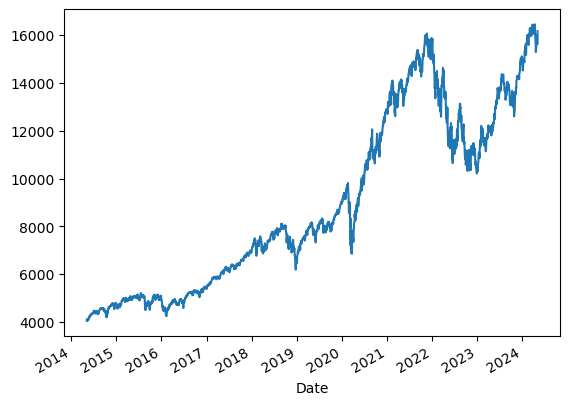

In [5]:
# Plot NASDAQ Close
df_nasdaq_close.plot()

In [6]:
# Store the S&P 500 data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_sp500 = pd.read_csv(
    "~/project_1/Resources/SP500_HistoricalData_1715050201148.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_sp500.head())
display(df_sp500.tail())

,Close/Last,Open,High,Low
Date,,,,
2024-05-03,5127.79,5122.78,5139.12,5101.22
2024-05-02,5064.20,5049.32,5073.21,5011.05
2024-05-01,5018.39,5029.03,5096.12,5013.45
2024-04-30,5035.69,5103.78,5110.83,5035.31
2024-04-29,5116.17,5114.13,5123.49,5088.65


,Close/Last,Open,High,Low
Date,,,,
2014-05-12,1896.65,1880.03,1897.13,1880.03
2014-05-09,1878.48,1875.27,1878.57,1867.02
2014-05-08,1875.63,1877.39,1889.07,1870.05
2014-05-07,1878.21,1868.53,1878.83,1859.79
2014-05-06,1867.72,1883.69,1883.69,1867.72


In [7]:
# Rename close column name
df_sp500.rename(columns={'Close/Last': 'SP500 Close'}, inplace=True)

In [8]:
# Create new df with just Close prices
df_sp500_close = df_sp500['SP500 Close']

In [10]:
#day_grouped_mean = df_sp500_close.groupby([df_sp500_close.index.isocalendar().day])
#day_mean = day_grouped_mean.mean()
#day_mean.head(10)

<Axes: xlabel='Date'>

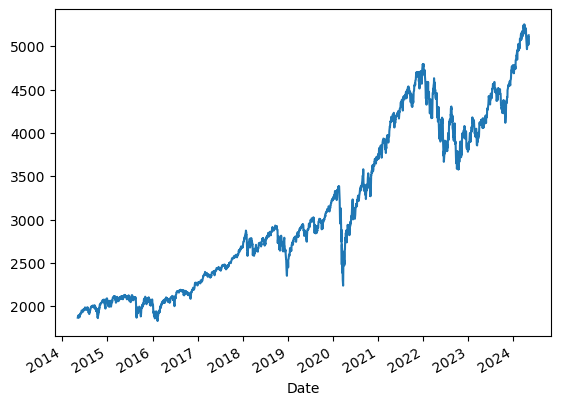

In [11]:
# Plot S&P 500 Close
df_sp500_close.plot()

In [12]:
# Concat NASDAQ and S&P 500 close dataframes
df_nasdaq_sp500_close = pd.concat([df_nasdaq_close, df_sp500_close], axis=1)

In [13]:
# Review the first and last five rows of the DataFrame
display(df_nasdaq_sp500_close.head())
display(df_nasdaq_sp500_close.tail())

,NASDAQ Close,SP500 Close
Date,,
2024-05-03,16156.33,5127.79
2024-05-02,15840.96,5064.20
2024-05-01,15605.48,5018.39
2024-04-30,15657.82,5035.69
2024-04-29,15983.08,5116.17


,NASDAQ Close,SP500 Close
Date,,
2014-05-12,4143.86,1896.65
2014-05-09,4071.87,1878.48
2014-05-08,4051.50,1875.63
2014-05-07,4067.67,1878.21
2014-05-06,4080.76,1867.72


In [14]:
# Calculate correlations for NASDAQ and SP500
df_nasdaq_sp500_close.corr()

,NASDAQ Close,SP500 Close
NASDAQ Close,1.000000,0.988605
SP500 Close,0.988605,1.000000


In [37]:
# Create a column that contains the SP500 daily return data
# Use the pct_change function to calculate the daily return values
df_nasdaq_sp500_close['NASDAQ Daily Return'] = df_nasdaq_sp500_close['NASDAQ Close'].pct_change()

In [38]:
df_nasdaq_sp500_close

,NASDAQ Close,SP500 Close,SP 500 Daily Return,NASDAQ Daily Return
Date,,,,
2024-05-03,16156.33,5127.79,NaN,NaN
2024-05-02,15840.96,5064.20,-0.012401,-0.019520
2024-05-01,15605.48,5018.39,-0.009046,-0.014865
2024-04-30,15657.82,5035.69,0.003447,0.003354
2024-04-29,15983.08,5116.17,0.015982,0.020773
...,...,...,...,...
2014-05-12,4143.86,1896.65,-0.000422,0.003315
2014-05-09,4071.87,1878.48,-0.009580,-0.017373
2014-05-08,4051.50,1875.63,-0.001517,-0.005003


In [40]:
# Create new df with just NASDAQ Daily Return
df_nasdaq_daily_return = df_nasdaq_sp500_close['NASDAQ Daily Return']
df_nasdaq_daily_return

Date
2024-05-03         NaN
2024-05-02   -0.019520
2024-05-01   -0.014865
2024-04-30    0.003354
2024-04-29    0.020773
                ...   
2014-05-12    0.003315
2014-05-09   -0.017373
2014-05-08   -0.005003
2014-05-07    0.003991
2014-05-06    0.003218
Name: NASDAQ Daily Return, Length: 2531, dtype: float64

<Axes: xlabel='Date'>

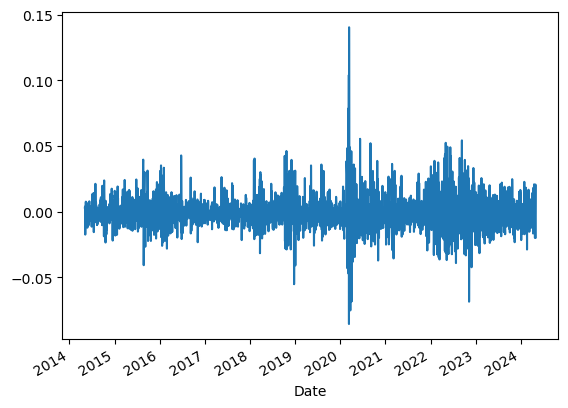

In [41]:
# Plot NASDAQ daily returns
df_nasdaq_daily_return.plot()

In [42]:
# Calculate average day of the week return
nasdaq_dow_return_grouped_mean = df_nasdaq_daily_return.groupby([df_nasdaq_daily_return.index.isocalendar().day])
nasdaq_dow_return_mean = nasdaq_dow_return_grouped_mean.mean()
nasdaq_dow_return_mean

day
1   -0.000954
2   -0.000740
3   -0.000103
4   -0.000391
5   -0.000125
Name: NASDAQ Daily Return, dtype: float64

<Axes: xlabel='day'>

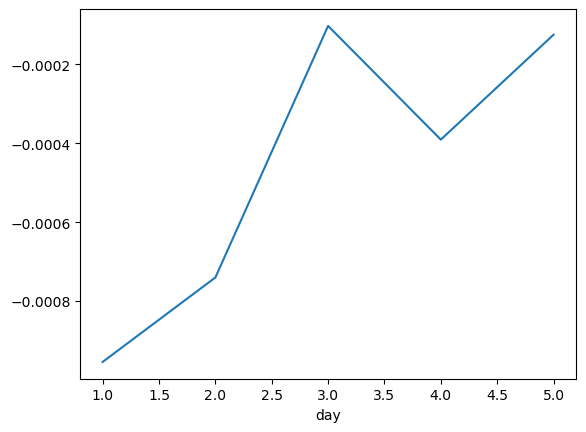

In [43]:
# Plot NASDAQ average day of week returns
nasdaq_dow_return_mean.plot()

In [44]:
# Calculate average day of the month return
nasdaq_dom_return_grouped_mean = df_nasdaq_daily_return.groupby([df_nasdaq_daily_return.index.day])
nasdaq_dom_return_mean = nasdaq_dom_return_grouped_mean.mean()
nasdaq_dom_return_mean

Date
1    -0.001059
2     0.002678
3    -0.003652
4     0.000700
5     0.000758
6     0.000874
7    -0.001744
8     0.000053
9    -0.001311
10    0.002430
11   -0.000379
12   -0.001641
13    0.000053
14   -0.002220
15   -0.001898
16    0.000294
17    0.000512
18   -0.000065
19    0.000213
20    0.000125
21   -0.000423
22    0.000114
23   -0.001096
24   -0.000414
25   -0.000941
26    0.000369
27   -0.001691
28   -0.002295
29   -0.001244
30   -0.000364
31   -0.001002
Name: NASDAQ Daily Return, dtype: float64

<Axes: xlabel='Date'>

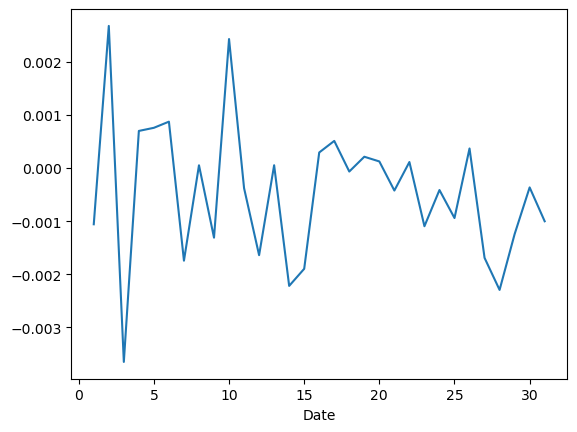

In [45]:
# Plot NASDAQ average day of month returns
nasdaq_dom_return_mean.plot()

In [46]:
# Calculate average week of the year return
nasdaq_woy_return_grouped_mean = df_nasdaq_daily_return.groupby([df_nasdaq_daily_return.index.isocalendar().week])
nasdaq_woy_return_mean = nasdaq_woy_return_grouped_mean.mean()
nasdaq_woy_return_mean

week
1     0.000307
2    -0.000805
3    -0.002151
4    -0.001674
5     0.000876
6    -0.002074
7    -0.000587
8    -0.000872
9     0.002341
10    0.002075
11    0.000521
12    0.000113
13   -0.004466
14    0.001395
15   -0.001747
16   -0.000097
17   -0.000656
18    0.002119
19   -0.000889
20   -0.001029
21   -0.002736
22   -0.001585
23   -0.000035
24   -0.000651
25   -0.001005
26   -0.000384
27   -0.003321
28   -0.001522
29   -0.002840
30    0.000128
31   -0.000242
32   -0.000766
33    0.000843
34    0.001348
35   -0.002302
36    0.001532
37    0.001340
38    0.002060
39    0.001235
40   -0.000590
41   -0.000131
42   -0.000674
43   -0.000290
44   -0.002247
45   -0.002346
46   -0.000764
47   -0.001375
48   -0.000242
49   -0.000551
50    0.002221
51   -0.000761
52   -0.001809
53    0.005496
Name: NASDAQ Daily Return, dtype: float64

<Axes: xlabel='week'>

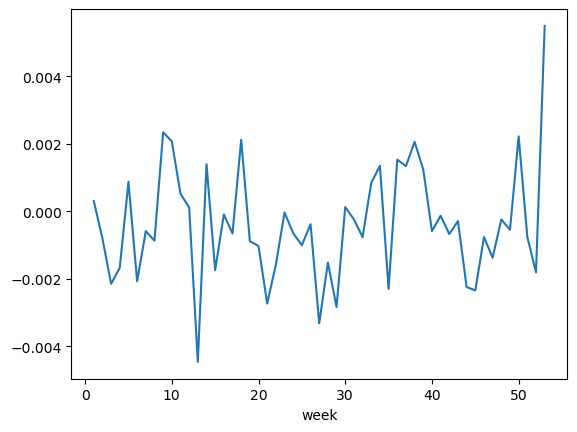

In [47]:
# Plot NASDAQ average week of year returns
nasdaq_woy_return_mean.plot()

In [16]:
# Create a column that contains the SP500 daily return data
# Use the pct_change function to calculate the daily return values
df_nasdaq_sp500_close['SP 500 Daily Return'] = df_nasdaq_sp500_close['SP500 Close'].pct_change()

In [17]:
df_nasdaq_sp500_close

,NASDAQ Close,SP500 Close,SP 500 Daily Return
Date,,,
2024-05-03,16156.33,5127.79,NaN
2024-05-02,15840.96,5064.20,-0.012401
2024-05-01,15605.48,5018.39,-0.009046
2024-04-30,15657.82,5035.69,0.003447
2024-04-29,15983.08,5116.17,0.015982
...,...,...,...
2014-05-12,4143.86,1896.65,-0.000422
2014-05-09,4071.87,1878.48,-0.009580
2014-05-08,4051.50,1875.63,-0.001517


In [20]:
# Create new df with just S&P 500 Daily Return
df_sp500_daily_return = df_nasdaq_sp500_close['SP 500 Daily Return']
df_sp500_daily_return

Date
2024-05-03         NaN
2024-05-02   -0.012401
2024-05-01   -0.009046
2024-04-30    0.003447
2024-04-29    0.015982
                ...   
2014-05-12   -0.000422
2014-05-09   -0.009580
2014-05-08   -0.001517
2014-05-07    0.001376
2014-05-06   -0.005585
Name: SP 500 Daily Return, Length: 2531, dtype: float64

<Axes: xlabel='Date'>

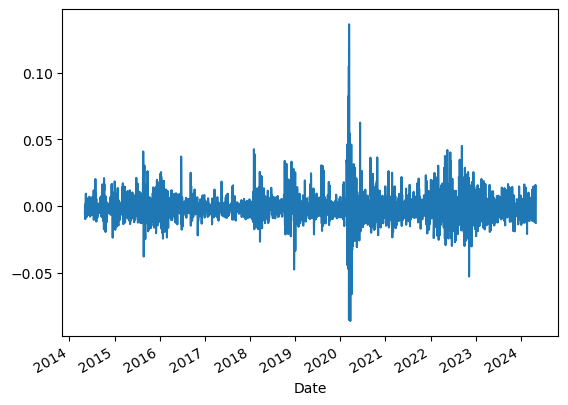

In [33]:
# Plot S&P 500 daily returns
df_sp500_daily_return.plot()

In [30]:
# Calculate average day of the week return
SP500_dow_return_grouped_mean = df_sp500_daily_return.groupby([df_sp500_daily_return.index.isocalendar().day])
SP500_dow_return_mean = SP500_dow_return_grouped_mean.mean()
SP500_dow_return_mean

day
1   -0.000714
2   -0.000501
3   -0.000066
4   -0.000504
5    0.000077
Name: SP 500 Daily Return, dtype: float64

<Axes: xlabel='day'>

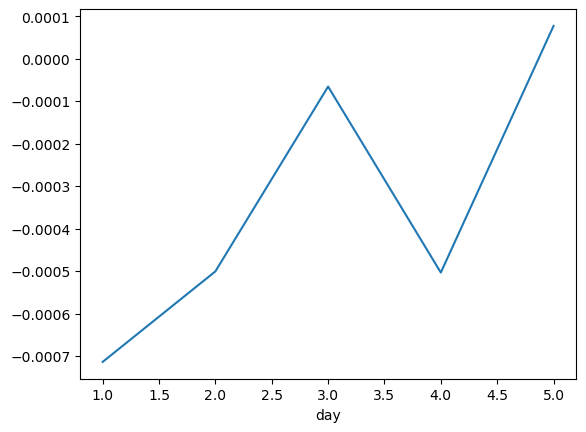

In [34]:
# Plot S&P 500 average day of week returns
SP500_dow_return_mean.plot()

In [29]:
# Calculate average day of the month return
SP500_dom_return_grouped_mean = df_sp500_daily_return.groupby([df_sp500_daily_return.index.day])
SP500_dom_return_mean = SP500_dom_return_grouped_mean.mean()
SP500_dom_return_mean

Date
1    -0.001033
2     0.001434
3    -0.003209
4    -0.000274
5     0.000243
6     0.000601
7    -0.001694
8     0.000303
9    -0.001364
10    0.002828
11    0.000167
12   -0.001178
13    0.000164
14   -0.001602
15   -0.001809
16    0.000346
17    0.000924
18    0.000282
19    0.000558
20    0.000273
21    0.000168
22    0.000071
23   -0.001202
24   -0.000672
25   -0.000224
26    0.000249
27   -0.001541
28   -0.002133
29   -0.000775
30   -0.000028
31   -0.000191
Name: SP 500 Daily Return, dtype: float64

<Axes: xlabel='Date'>

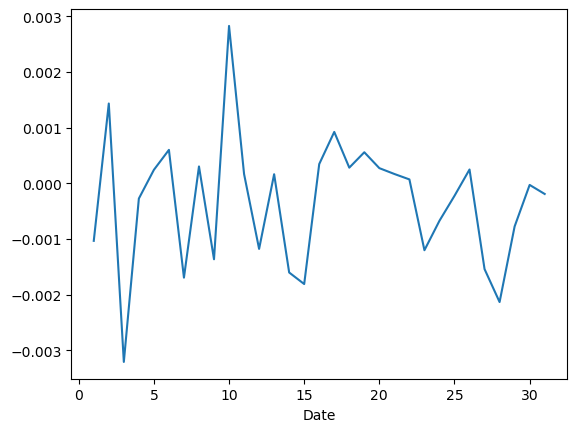

In [35]:
# Plot S&P 500 average day of month returns
SP500_dom_return_mean.plot()

In [32]:
# Calculate average week of the year return
SP500_woy_return_grouped_mean = df_sp500_daily_return.groupby([df_sp500_daily_return.index.isocalendar().week])
SP500_woy_return_mean = SP500_woy_return_grouped_mean.mean()
SP500_woy_return_mean

week
1     0.000263
2    -0.000412
3    -0.000976
4    -0.001272
5     0.000969
6    -0.001685
7    -0.000779
8    -0.000487
9     0.001230
10    0.002718
11    0.001270
12    0.001231
13   -0.004872
14    0.000439
15   -0.001622
16    0.000019
17   -0.000457
18    0.001231
19   -0.000434
20   -0.000434
21   -0.001267
22   -0.001449
23   -0.000496
24    0.000850
25   -0.000719
26   -0.000332
27   -0.002522
28   -0.000805
29   -0.002376
30   -0.000351
31    0.000496
32   -0.001266
33    0.000579
34    0.001692
35   -0.001224
36    0.000586
37    0.001168
38    0.001661
39    0.001104
40   -0.000992
41   -0.000106
42   -0.000681
43   -0.000307
44   -0.002425
45   -0.002420
46   -0.001010
47   -0.000441
48   -0.001068
49   -0.000545
50    0.002422
51   -0.000840
52   -0.002078
53    0.003908
Name: SP 500 Daily Return, dtype: float64

<Axes: xlabel='week'>

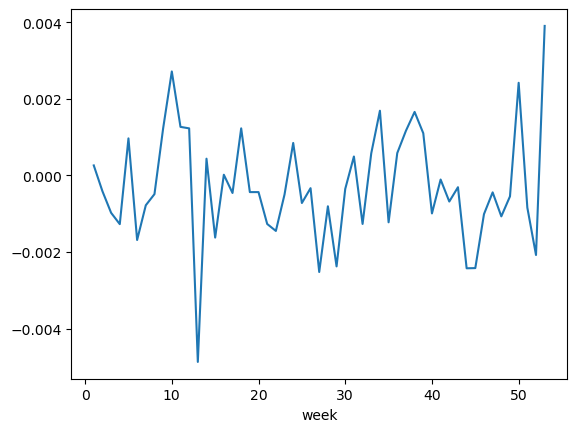

In [36]:
# Plot S&P 500 average week of year returns
SP500_woy_return_mean.plot()